In [5]:
setwd(paste0(Sys.getenv('R_SOURCES'), '/house_prices'))
getwd()

[1] "/mnt/hdd/develop/kaggle/R_sources/house_prices"

In [46]:
source('main.R')
house_prices$helpers$import_libs()

combined_dataset <-
    # load data
    house_prices$helpers$load_data() %>%
    select(-one_of(house_prices$attributes_selection$discared_cat_vars)) %>%
    select(-one_of(house_prices$attributes_selection$discared_num_vars)) %>%
    # remove outliers
    (house_prices$outliers$remove_outliers) %>%
    # fix NA values
    (house_prices$missing$categ$replace_with_most_common) %>%
    (house_prices$missing$categ$fix_valid) %>%
    (house_prices$missing$numeric$replace_with_zero) %>%
    mutate(
        price_log = log(SalePrice)
    ) %>%
    select(-SalePrice, -Id) %>%
    # transform numeric
    house_prices$trans$numeric$apply_transform(debug=TRUE) %>%
    # transform categorical
    house_prices$trans$categ$rating_transform(price_log)

combined_dataset %>% head

# A tibble: 5 x 3
           var predictor    score
         <chr>     <chr>    <dbl>
1    BsmtUnfSF      sqrt 79.97603
2    GrLivArea       log 91.15794
3      LotArea       log 73.38993
4 TotRmsAbvGrd       log 30.68502
5    X1stFlrSF       log 90.77166


Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtQual,CentralAir,Electrical,Exterior1st,Exterior2nd,⋯,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,dataSource,price_log
2.531822,2.564039,2.540871,2.320042,3.262019,3.066343,2.57887,2.591898,3.046602,3.057540,⋯,0,2003,2,548,0,61,2,2008,train,12.24769
2.531822,2.564039,2.540871,3.295455,2.231818,3.066343,2.57887,2.591898,1.968182,1.967290,⋯,1,1976,2,460,298,0,5,2007,train,12.10901
2.531822,2.564039,2.540871,2.675439,3.262019,3.066343,2.57887,2.591898,3.046602,3.057540,⋯,1,2001,2,608,0,42,9,2008,train,12.31717
2.531822,2.564039,3.046154,2.320042,2.231818,1.847458,2.57887,2.591898,1.980583,2.052632,⋯,1,1998,3,642,0,35,2,2006,train,11.84940
2.531822,2.564039,2.540871,2.900452,3.262019,3.066343,2.57887,2.591898,3.046602,3.057540,⋯,1,2000,3,836,192,84,12,2008,train,12.42922
2.531822,2.564039,2.540871,2.320042,3.262019,3.066343,2.57887,2.591898,3.046602,3.057540,⋯,0,1993,2,480,40,30,10,2009,train,11.87060


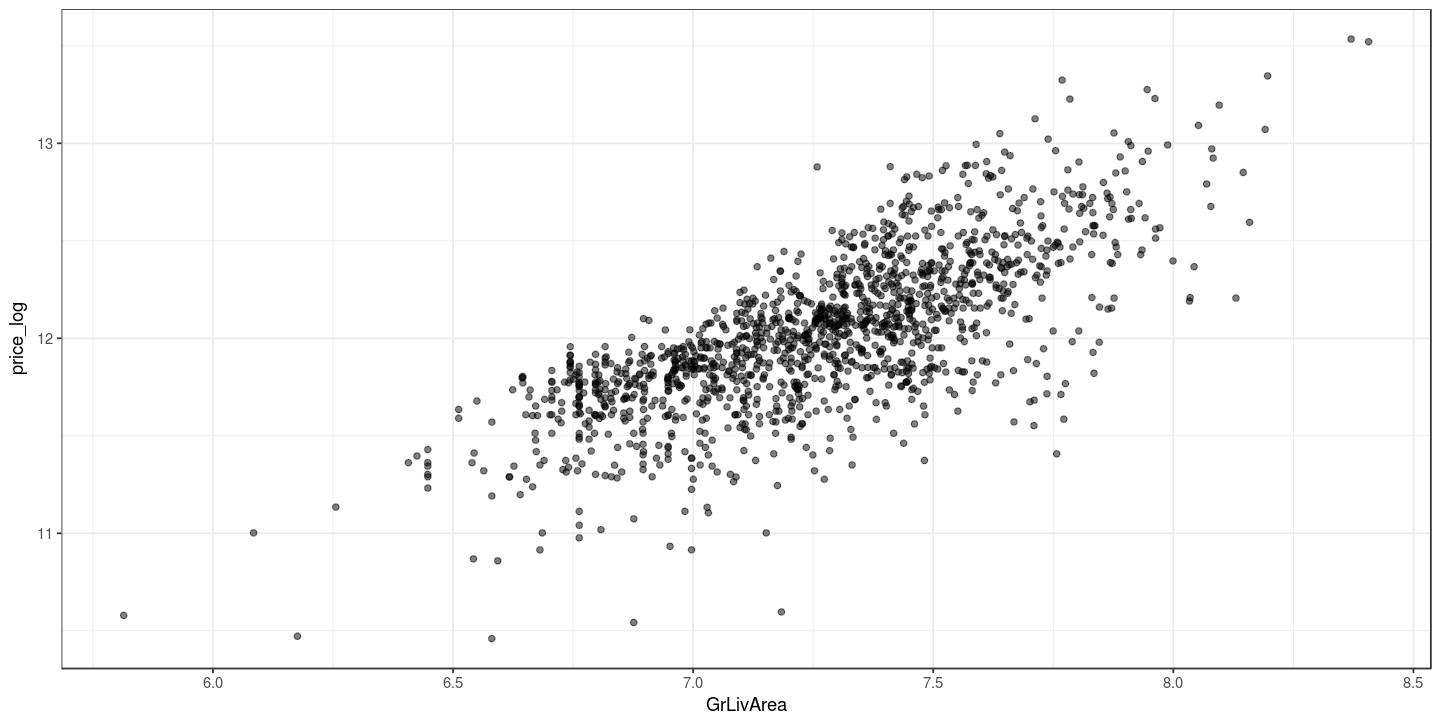

In [51]:
options(repr.plot.width = 12, repr.plot.height = 6)

training_dataset <- combined_dataset %>% filter(dataSource == 'train') %>% select(-dataSource)

training_dataset %>%
ggplot() +
geom_point(aes(x=GrLivArea, y=price_log), alpha=0.5) +
theme_bw()

In [34]:
mod <- lm(price_log ~ GrLivArea, 
          data=training_dataset)

mod %>% glance
mod %>% tidy

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.5438044,0.543491,0.2700695,1735.613,2.062234e-250,2,-159.179,324.3581,340.2125,106.1971,1456


term,estimate,std.error,statistic,p.value
(Intercept),5.5359940,0.1558952,35.51099,1.767191e-199
GrLivArea,0.8928344,0.0214311,41.66069,2.062234e-250


In [35]:
mod <- lm(price_log ~ OverallQual, 
          data=training_dataset)

mod %>% glance
mod %>% tidy

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.6747053,0.6744819,0.2280544,3019.942,0,2,87.3617,-168.7234,-152.8689,75.72483,1456


term,estimate,std.error,statistic,p.value
(Intercept),10.5703142,0.027118795,389.7782,0
OverallQual,0.2385466,0.004340842,54.9540,0


In [36]:
mod <- lm(price_log ~ GrLivArea + OverallQual, data=training_dataset)

mod %>% glance
mod %>% tidy



r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.7641906,0.7638664,0.194236,2357.618,0,3,321.8864,-635.7728,-614.6335,54.89371,1455


term,estimate,std.error,statistic,p.value
(Intercept),7.6588878,0.126036731,60.76711,0.000000e+00
GrLivArea,0.4565688,0.019430309,23.49777,9.051174e-104
OverallQual,0.1718658,0.004660648,36.87594,9.636469e-211


[1] 0.608875

In [40]:
mod <- lm(GrLivArea ~  OverallQual, data=training_dataset)

mod %>% glance
mod %>% tidy
cor(training_dataset$GrLivArea, training_dataset$OverallQual)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.3707287,0.3702965,0.2619808,857.7874,1.228171e-148,2,-114.8437,235.6874,251.5419,99.93099,1456


term,estimate,std.error,statistic,p.value
(Intercept),6.3767523,0.031153104,204.69075,0.000000e+00
OverallQual,0.1460477,0.004986604,29.28801,1.228171e-148


[1] 0.608875

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.7634179,0.7630927,0.194554,2347.542,0,3,319.5016,-631.0031,-609.8639,55.07358,1455


term,estimate,std.error,statistic,p.value
(Intercept),7.2889012,0.142376539,51.19454,0.000000e+00
OverallQual,0.2384925,0.003703188,64.40194,0.000000e+00
zzz,3.2816137,0.140492913,23.35786,9.821276e-103


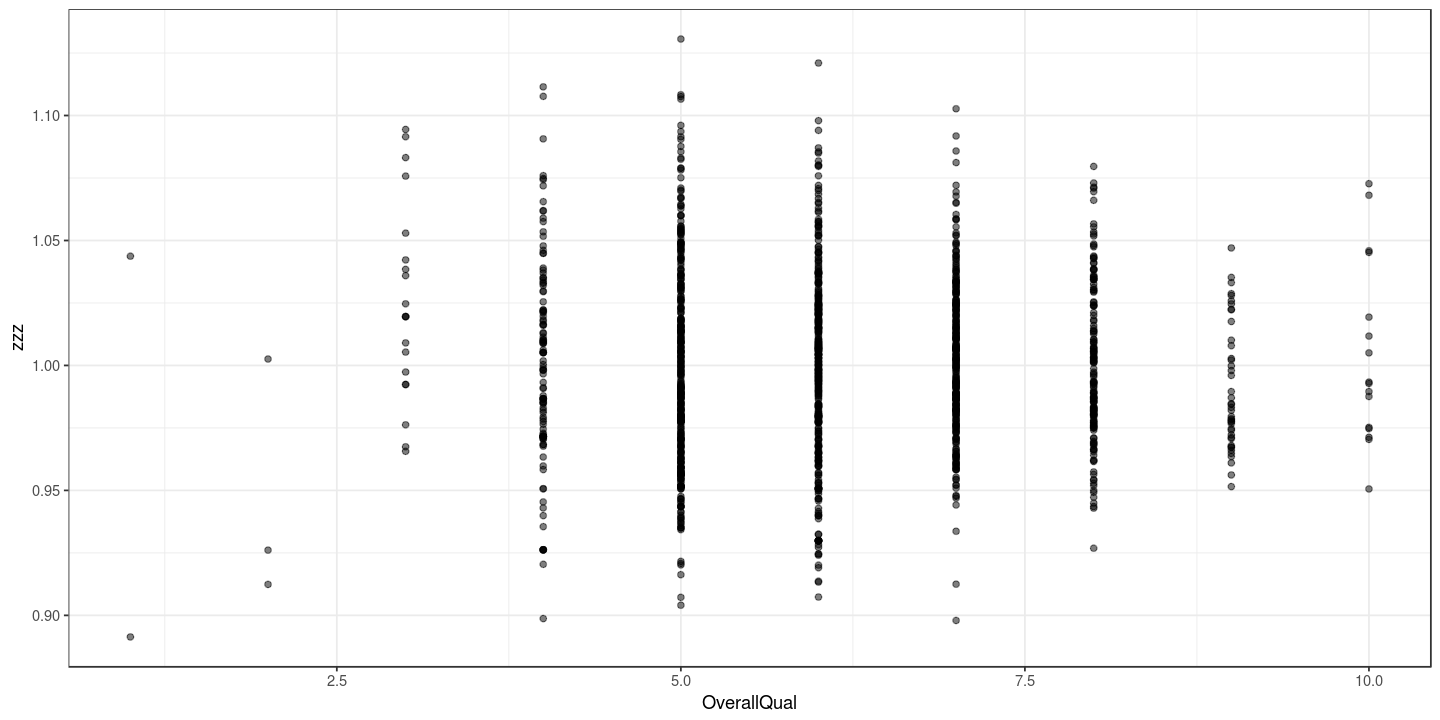

In [45]:
options(repr.plot.width = 12, repr.plot.height = 6)

df <-
    training_dataset %>%
    select(GrLivArea, OverallQual, price_log) %>%
    mutate(
        zzz = GrLivArea / (OverallQual * 0.146 + 6.3767523)
    )

mod <- lm(price_log ~ OverallQual + zzz, data=df)

mod %>% glance
mod %>% tidy


df %>%
ggplot() +
geom_point(aes(x=OverallQual, y=zzz), alpha=0.5) +
theme_bw()

In [56]:
mod <- lm(price_log ~ ., data=training_dataset)

mod %>% glance
mod %>% tidy %>% filter(p.value < 0.2) %>% arrange(p.value)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.9222154,0.9188747,0.113849,276.0477,0,61,1130.406,-2136.813,-1809.154,18.10735,1397


term,estimate,std.error,statistic,p.value
OverallQual,6.063319e-02,4.331976e-03,13.996657,9.374418e-42
OverallCond,4.756816e-02,3.701377e-03,12.851476,8.258881e-36
TotalBsmtSF,1.248986e-04,2.114592e-05,5.906508,4.382335e-09
LotArea,5.237657e-02,8.984523e-03,5.829643,6.888783e-09
X2ndFlrSF,1.533194e-04,2.740220e-05,5.595148,2.648971e-08
Neighborhood,3.859246e-02,7.102367e-03,5.433746,6.502778e-08
X1stFlrSF,1.822695e-01,3.528269e-02,5.165976,2.738071e-07
MSZoning,4.436405e-02,8.767195e-03,5.060233,4.744370e-07
SaleCondition,7.895803e-02,1.672719e-02,4.720342,2.590929e-06
BsmtFinSF1,5.291716e-05,1.560320e-05,3.391430,7.147049e-04
